# GRADED CHALLENGE 4

IRFAN FAHMUDDIN (FTDS-011)

**PROSES QUERY DATA PADA GOOGLE CLOUD**

select * from `ftds-hacktiv8-project.phase1_assignments.credit-card-information`
where mod(CUST_ID, 2) = 1;

**OBJECTIVES**
Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

In [3]:
# import library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering




## DATA LOADING

In [4]:
df = pd.read_csv('h8dsft_P1G4_irfan_fahmuddin.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


1. CUSTID                   : Identification of Credit Card holder (Categorical)
2. BALANCE                  : Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY         : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES                : Amount of purchases made from account
5. ONEOFFPURCHASES          : Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES    : Amount of purchase done in installment
7. CASHADVANCE              : Cash in advance given by the user
8. PURCHASESFREQUENCY       : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY    : How frequently the cash in advance being paid
12. CASHADVANCETRX          : Number of Transactions made with "Cash in Advanced"
13. PURCHASESTRX            : Numbe of purchase transactions made
14. CREDITLIMIT             : Limit of Credit Card for user
15. PAYMENTS                : Amount of Payment done by user
16. MINIMUM_PAYMENTS        : Minimum amount of payments made by user
17. PRCFULLPAYMENT          : Percent of full payment paid by user
18. TENURE                  : Tenure of credit card service for user

In [5]:
# cek info data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

terdapat missing values sebanayak 155 pada kolom minimum payment

## EDA

Text(0, 0.5, 'CREDIT_LIMIT')

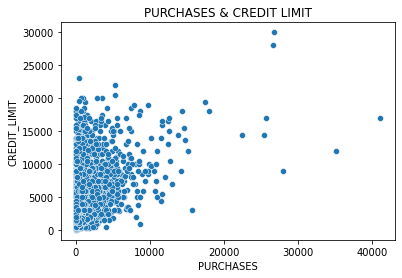

In [7]:
# cek purchases terhadap credit limit
sns.scatterplot(data = df, x= df['PURCHASES'],y= df['CREDIT_LIMIT'])
plt.title('PURCHASES & CREDIT LIMIT')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')

Diketahui bahwa beberapa pengguna yang limitnya tinggi belum tentu melaakukan pembelian/ purchases dalam jumlah yang banyak juga. Hanya beberapa pengguna saja yang melakukan pembelian dalam jumlah yang banyak dan limit kartunya cukup tinggi.

Text(0, 0.5, 'CREDIT_LIMIT')

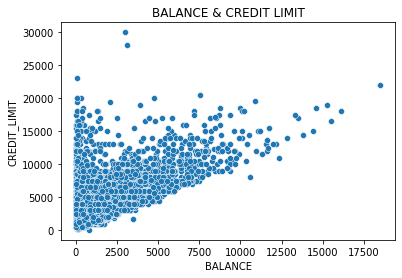

In [8]:
# cek purchases terhadap credit limit
sns.scatterplot(data = df, x= df['BALANCE'],y= df['CREDIT_LIMIT'])
plt.title('BALANCE & CREDIT LIMIT')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

Berdasrkan gambar diatas, kita dapat tahu bahwa semakin tinggi limit kartu kreditnya maka saldo yang ada didalam kartu tersebut semakin tinggi juga. hal ini menandakan adanya korelasi yang cukup tinggi diantara keduanya dan didalam kehidupan wajar seseorang memiliki saldo yang tinggi ketika limit kartunya tinggi.

Text(0, 0.5, 'CREDIT_LIMIT')

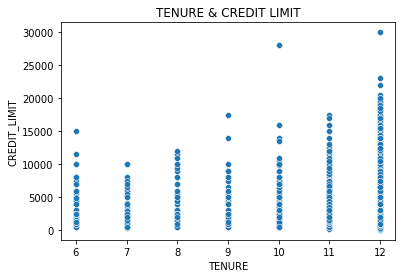

In [9]:
# cek purchases terhadap credit limit
sns.scatterplot(data = df, x= df['TENURE'],y= df['CREDIT_LIMIT'])
plt.title('TENURE & CREDIT LIMIT')
plt.xlabel('TENURE')
plt.ylabel('CREDIT_LIMIT')

Kita menduga bahwa limit kartu yang besar akan membuat tenure suatu kartu semakin lama juga. Dari gambar diatas memang terlihat bahwa tenure 12 bulan banyak dimiliki oleh pengguna limit yang tinggi dan terlihat bahwa pengguna dengan tenure 6 bulan memiliki limit paling besar 15000 saja. Jikda kedua data ini berkorelasi akan membentuk garis diagonal pada gambar.

Text(0, 0.5, 'BALANCE')

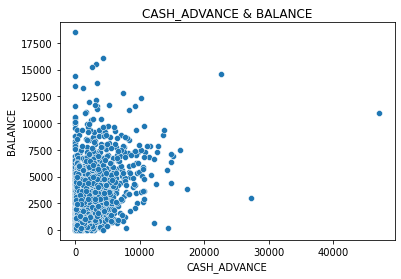

In [10]:
# cek purchases terhadap credit limit
sns.scatterplot(data = df, x= df['CASH_ADVANCE'],y= df['BALANCE'])
plt.title('CASH_ADVANCE & BALANCE')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('BALANCE')

Berdasarkan plot diatas, ternyata cash advance ini tidak memiliki korelasi atau korelasinya sangat kecil terhadap balance. mungkin ada sedikit korelasi jika dilihat dari saat cash advance 0-1000 dan balance 0-5000. Disana terlihat ada titik data yg membentuk diagonal pada daerah tersebut.

In [11]:
# cek minimum payment dari data ini
df['MINIMUM_PAYMENTS'].describe()

count     4320.000000
mean       873.976757
std       2436.877272
min          0.019163
25%        168.590144
50%        313.980229
75%        819.371080
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

<AxesSubplot:>

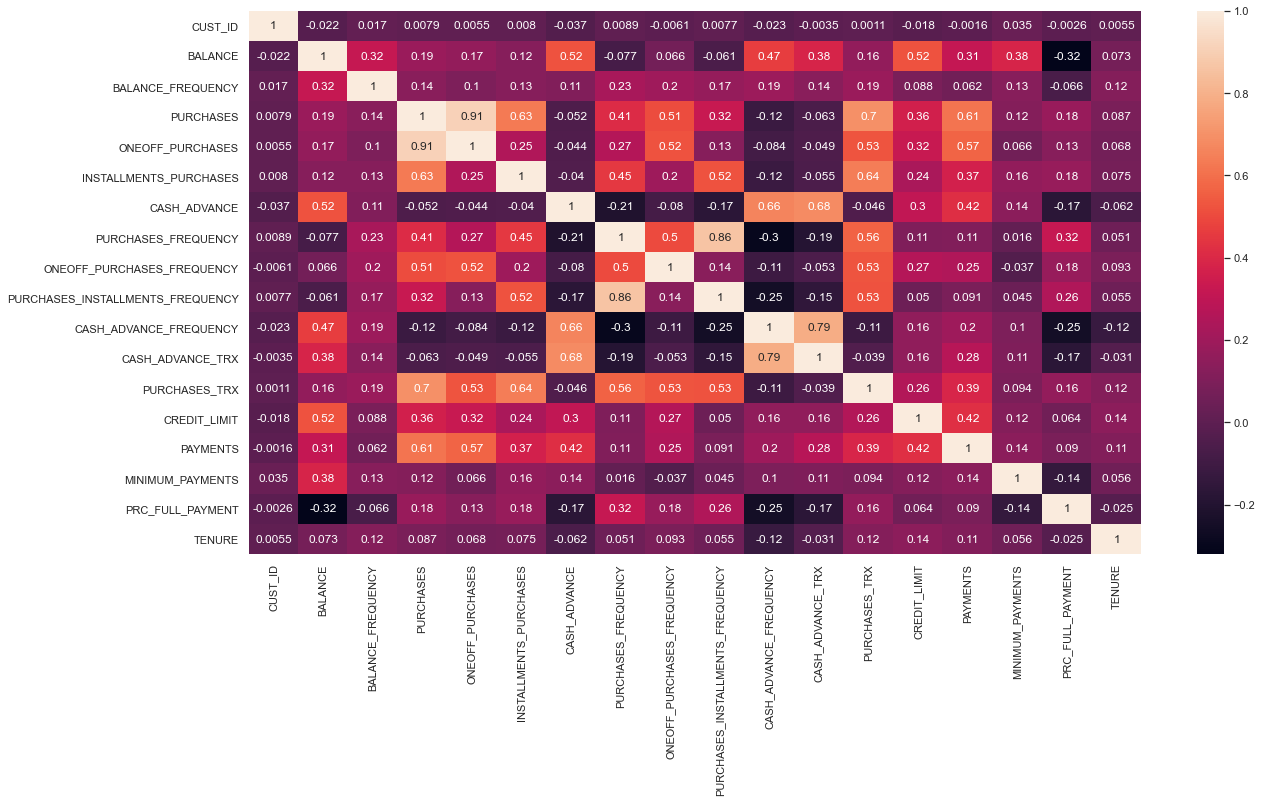

In [12]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(),annot=True)

Gambar diatas menunjukkan korelasi dari semua fitur yang ada dari rentang 0 hingga 1. semakin mendekati 1 atau berwarna cerah maka korelasi antar fitur akan semakin tinggi. semakin mendekati 0 atau berwarna gelap maka korelasi antara fitur semakin kecil atau tidak ada korelasi sama sekali.

## DATA PREPROCESSING

In [13]:
# copy data

datacopy = df.copy()
datacopy

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [14]:
# drop kolom ID

datacopy.drop(columns='CUST_ID', inplace= True)

In [15]:
datacopy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


### Data inference

In [16]:
# membuat data inference
data_inf = datacopy.sample(10, random_state=42)
data_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2519,605.203304,1.000000,1279.50,543.00,736.50,203.148527,1.000000,0.375000,0.875000,0.250000,5,37,1000.0,661.341498,142.598800,0.142857,8
2655,1377.184745,1.000000,0.00,0.00,0.00,173.972384,0.000000,0.000000,0.000000,0.500000,7,0,1500.0,366.247349,451.841215,0.000000,12
2110,101.564003,1.000000,418.59,0.00,418.59,0.000000,0.833333,0.000000,0.500000,0.000000,0,5,1000.0,422.538988,81.389378,0.500000,6
151,27.533451,0.909091,187.50,0.00,187.50,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,2000.0,280.024940,137.468980,0.333333,12
4189,4218.956639,1.000000,0.00,0.00,0.00,4734.304587,0.000000,0.000000,0.000000,0.583333,44,0,4500.0,5557.539676,1434.238518,0.083333,12
721,625.144248,1.000000,958.39,365.00,593.39,0.000000,1.000000,0.166667,1.000000,0.000000,0,30,4000.0,881.159896,205.198021,0.000000,12
1627,173.331107,1.000000,1301.44,916.80,384.64,0.000000,0.916667,0.583333,0.750000,0.000000,0,25,4000.0,954.989463,185.615324,0.300000,12
3718,5238.915225,1.000000,270.00,270.00,0.00,2706.554295,0.166667,0.166667,0.000000,0.666667,14,3,6000.0,1259.203988,1197.398596,0.000000,12
2121,24.818476,0.909091,390.05,44.90,345.15,0.000000,0.833333,0.083333,0.750000,0.000000,0,11,1000.0,423.338628,117.838976,0.272727,12
790,236.264094,1.000000,1949.62,1430.92,518.70,0.000000,1.000000,1.000000,0.500000,0.000000,0,38,1800.0,1679.271891,163.817498,0.100000,12


In [17]:
# menghilangkan data inferencec pada data secara keseluruhan

data_train_test= datacopy.drop(data_inf.index)


In [18]:
# reset index

data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace = True)

## HANDLING MISSING VALUES DAN OUTLIER

### Handling missing values

In [19]:
# cek missing values

data_train_test.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [20]:
# cek skew data kolom minimum payments

data_train_test['MINIMUM_PAYMENTS'].skew()

14.65520521870944

Karena data skew maka akan diinputkan missing values dengan median

In [21]:
# cek data untuk mendapatkan median

data_train_test['MINIMUM_PAYMENTS'].median()

314.386305

In [22]:
# isi daatya dengan median
data_train_test['MINIMUM_PAYMENTS'].fillna(313.98, inplace= True)

In [23]:
data_train_test.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Data sudah tidaak ada yang missing values

### handling outlier

In [24]:
# cek skew dataset untuk melihat skewness

data_train_test.skew()

BALANCE                              2.330141
BALANCE_FREQUENCY                   -2.023034
PURCHASES                            7.065591
ONEOFF_PURCHASES                     9.942270
INSTALLMENTS_PURCHASES               6.324866
CASH_ADVANCE                         5.640582
PURCHASES_FREQUENCY                  0.060174
ONEOFF_PURCHASES_FREQUENCY           1.548676
PURCHASES_INSTALLMENTS_FREQUENCY     0.509882
CASH_ADVANCE_FREQUENCY               1.838016
CASH_ADVANCE_TRX                     6.452868
PURCHASES_TRX                        4.747316
CREDIT_LIMIT                         1.497174
PAYMENTS                             5.745471
MINIMUM_PAYMENTS                    14.899142
PRC_FULL_PAYMENT                     1.975287
TENURE                              -2.958475
dtype: float64

In [25]:
wins = Winsorizer(capping_method='iqr', 
                          tail='both',
                          fold=1.5,
                          variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                          'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT',
                          'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'])

wins.fit(data_train_test)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                      'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                      'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
                      'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                      'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                      'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

In [26]:
# transform data
data_cap= wins.transform(data_train_test)

In [27]:
# cek perubahabn skew kembali

data_cap.skew()

BALANCE                             1.166646
BALANCE_FREQUENCY                  -1.176215
PURCHASES                           1.207815
ONEOFF_PURCHASES                    1.248713
INSTALLMENTS_PURCHASES              1.211365
CASH_ADVANCE                        1.227942
PURCHASES_FREQUENCY                 0.060174
ONEOFF_PURCHASES_FREQUENCY          1.095123
PURCHASES_INSTALLMENTS_FREQUENCY    0.509882
CASH_ADVANCE_FREQUENCY              1.385674
CASH_ADVANCE_TRX                    1.279370
PURCHASES_TRX                       1.135808
CREDIT_LIMIT                        1.095394
PAYMENTS                            1.122783
MINIMUM_PAYMENTS                    1.163934
PRC_FULL_PAYMENT                    1.173763
TENURE                              0.000000
dtype: float64

## FEATURE SCALING
 metode sdcaling yang digunakan ialah minmax scaler karena banyak data yang skew

In [28]:
# feature scaling
scaler = MinMaxScaler()

# lakukan fit scaling untuk tiap data
scaler.fit(data_cap)

# lakukan transform scaling untuk tiap data yg skew dan normal
data_scaled = scaler.transform(data_cap)

## PCA

In [29]:
pca = PCA(n_components= 0.95)
data_reduced = pca.fit_transform(data_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [30]:
pca.n_components_

9

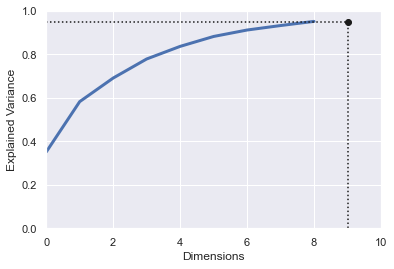

In [31]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")


plt.grid(True)

plt.show()

## MODEL DEFINITION
    
pada kasus ini, akan digunakan K means dan 2 metode lainnya untuk melakukan clustering terhadap dataset. 2 metode clustering lainnya yang digunakan adalah DBSCAN dan spectralclustering

In [54]:
k = 4 # menggunakan 2 teknik berbeda yaitu nilai k nya. sebelum eval, k = 5 dan setelah eval k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
sc = SpectralClustering(n_clusters=4, gamma=10, random_state=42)

## MODEL TRAINING

In [34]:
# training dengan kmeans
kmeans.fit(data_reduced)


KMeans(n_clusters=4, random_state=42)

In [45]:
# training dengan dbscan
dbscan.fit(data_reduced)


DBSCAN(eps=0.2)

In [55]:
# training dengan spectralclustering
sc.fit(data_reduced)

SpectralClustering(gamma=10, n_clusters=4, random_state=42)

In [56]:
y_pred = kmeans.fit_predict(data_reduced)
y_pred_dbs = dbscan.fit_predict(data_reduced)
y_pred_sc = sc.fit_predict(data_reduced)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

## MODEL EVALUATION

### eval kmeans

In [ ]:
silhouette_score(data_reduced, kmeans.labels_)

0.23722902625199496

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_reduced)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(data_train_test, model.labels_)
                     for model in kmeans_per_k[1:]]

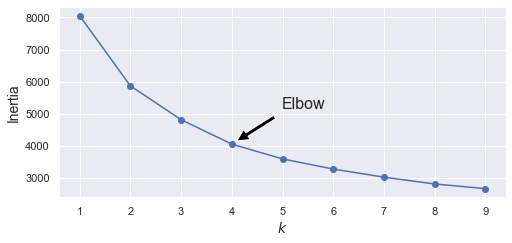

In [ ]:
# plot grafik untuk mealihat elbow berdasarkan nilai K
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.show()

In [ ]:
# membuat dataframe dari hasil clustering
clusters = pd.concat([data_train_test, pd.DataFrame({"ClusterID":kmeans.labels_})], axis=1)
clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ClusterID
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980000,0.0,8,3
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980000,0.0,8,3
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,3
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,3
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,2
4461,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,2
4462,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,2
4463,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,2


Dilakukan cek hasil labeling clustering kmeans denga plotting terhadap data

<AxesSubplot:xlabel='PURCHASES', ylabel='BALANCE'>

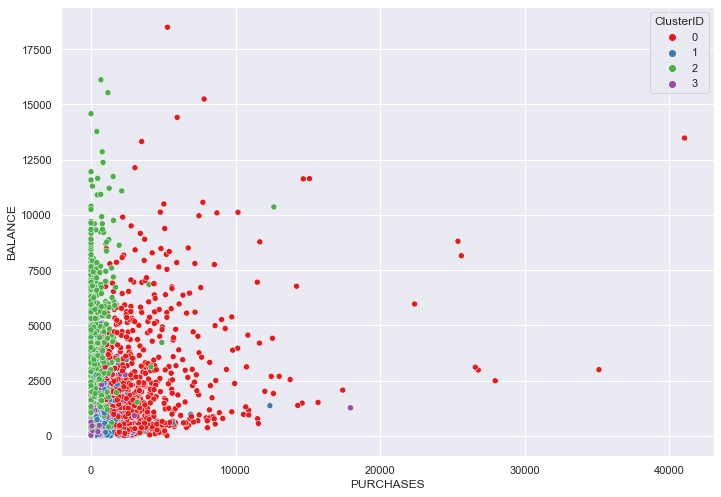

In [ ]:
# plotting terhadap purchases dan balance
figsize=(8,5)
sns.scatterplot(x='PURCHASES',y='BALANCE',hue='ClusterID',data = clusters,legend='full',palette="Set1")

<AxesSubplot:xlabel='PAYMENTS', ylabel='BALANCE'>

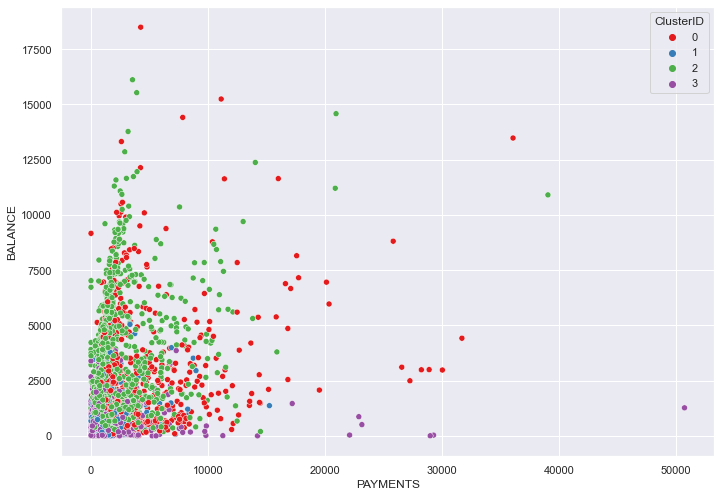

In [ ]:
# plotting terhadap payment dan balance
figsize=(8,5)
sns.scatterplot(x='PAYMENTS',y='BALANCE',hue='ClusterID',data = clusters,legend='full',palette="Set1")

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

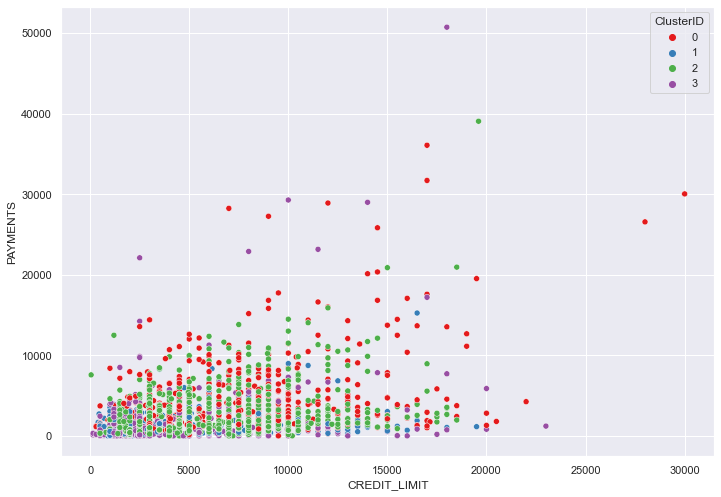

In [ ]:
# plotting terhadap income dan health
figsize=(8,5)
sns.scatterplot(x='CREDIT_LIMIT',y='PAYMENTS',hue='ClusterID',data = clusters,legend='full',palette="Set1")

Hasil plotting diatas belum bisa memberikan pandangan bagaimana proses clustering yg telah dibuat. Dengan menggunakan fitur yang memiliki korelasi tinggi seperti PURCHASES dan BALANCE memang sedikit terlihat perbedaannya namun untuk cluster 1 dan 3 masih sulit dibedakan karena terlalu berhimpitan

### Eval dbscan

In [46]:
y_pred_dbs

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [47]:
clusters_dbs = pd.concat([data_train_test, pd.DataFrame({"ClusterID":y_pred_dbs})], axis=1)
clusters_dbs

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ClusterID
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980000,0.0,8,-1
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980000,0.0,8,-1
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,-1
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,-1
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,-1
4461,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,-1
4462,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,-1
4463,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,-1


In [48]:
silhouette_score(data_reduced, y_pred_dbs)

-0.3697467824079684

<AxesSubplot:xlabel='PAYMENTS', ylabel='BALANCE'>

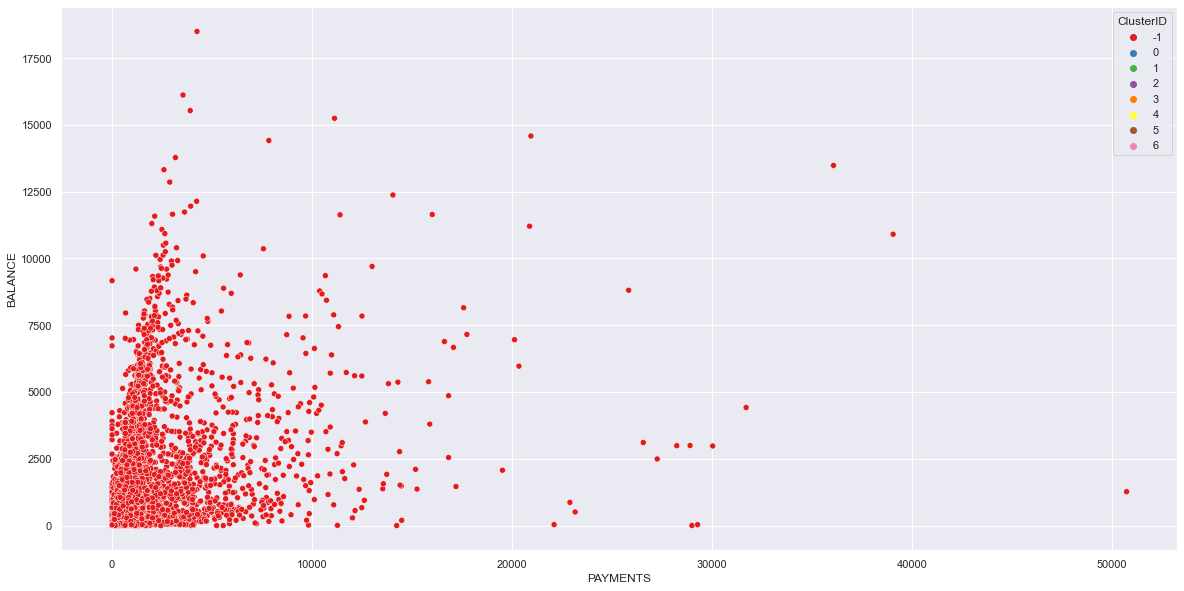

In [49]:
# plotting terhadap payment dan balance
figsize=(8,5)
sns.scatterplot(x='PAYMENTS',y='BALANCE',hue='ClusterID',data = clusters_dbs,legend='full',palette="Set1")

model dbscan dengan parameter yang ditentukan sebelumnya akan menghasilkan grafik seperti diatas. Terlihat bahwa hanya terdapat 1 clustering saja ditandai dengan data berwarna merah. berdasarkan hasil silhouette score pun nilainya -0.36 yang artinya model ini tidak cocok digunakan, sehingga dapat dikatakan model dbscan ini tidak lebih baik daripada kmeeans

### Eval spectralclustering

In [57]:
y_pred_sc

array([3, 3, 0, ..., 0, 0, 0])

In [58]:
clusters_sc = pd.concat([data_train_test, pd.DataFrame({"ClusterID":y_pred_sc})], axis=1)
clusters_sc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ClusterID
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980000,0.0,8,3
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980000,0.0,8,3
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,3
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,0
4461,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
4462,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4463,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


In [59]:
silhouette_score(data_reduced, y_pred_sc)

0.16378479355563852

<AxesSubplot:xlabel='PAYMENTS', ylabel='BALANCE'>

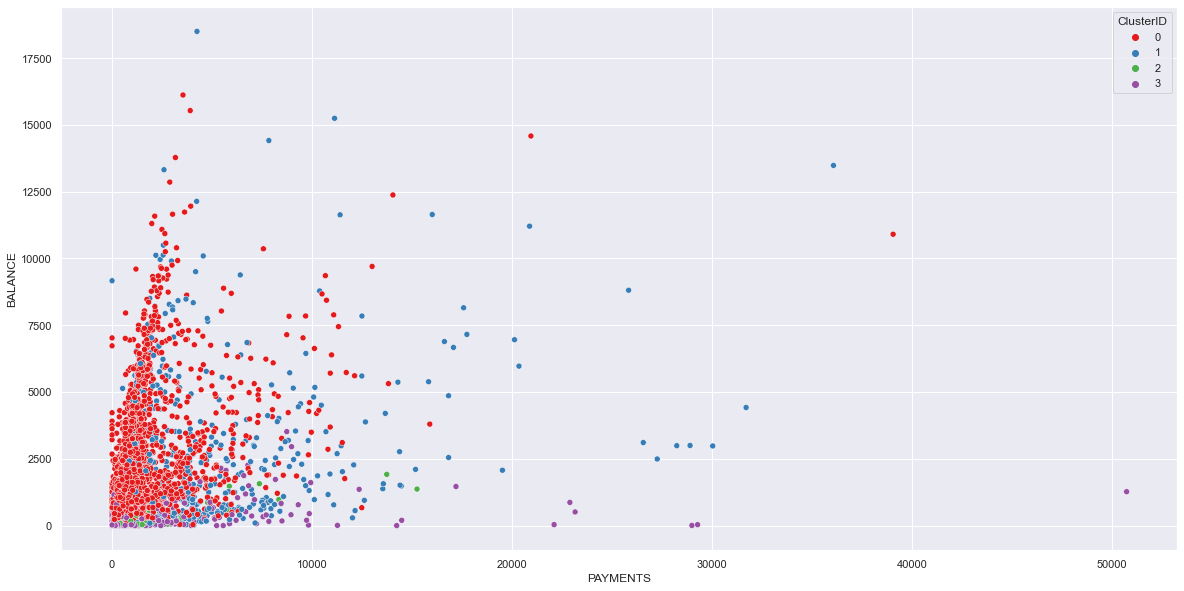

In [60]:
# plotting terhadap payment dan balance
figsize=(8,5)
sns.scatterplot(x='PAYMENTS',y='BALANCE',hue='ClusterID',data = clusters_sc,legend='full',palette="Set1")

Model dengan spectralclustering (SC) menghasilkan skor 0.16 dimana nilai ini lebih rendah daripada model kmeans sebelumnya. Dari gambar diatas, terdapat 4 cluster yg saama denga model kmeans namun perbedaan antara cluster sangat tidak terlihat dan jauh lebih bagus dengan kmeans,. sehingga model ini dapat dikatakan tidak lebih baik daripada menggunakan kmeans

## MODEL INFERENCE TEST

In [ ]:
data_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,605.203304,1.000000,1279.50,543.00,736.50,203.148527,1.000000,0.375000,0.875000,0.250000,5,37,1000.0,661.341498,142.598800,0.142857,8
1,1377.184745,1.000000,0.00,0.00,0.00,173.972384,0.000000,0.000000,0.000000,0.500000,7,0,1500.0,366.247349,451.841215,0.000000,12
2,101.564003,1.000000,418.59,0.00,418.59,0.000000,0.833333,0.000000,0.500000,0.000000,0,5,1000.0,422.538988,81.389378,0.500000,6
3,27.533451,0.909091,187.50,0.00,187.50,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,2000.0,280.024940,137.468980,0.333333,12
4,4218.956639,1.000000,0.00,0.00,0.00,4734.304587,0.000000,0.000000,0.000000,0.583333,44,0,4500.0,5557.539676,1434.238518,0.083333,12
5,625.144248,1.000000,958.39,365.00,593.39,0.000000,1.000000,0.166667,1.000000,0.000000,0,30,4000.0,881.159896,205.198021,0.000000,12
6,173.331107,1.000000,1301.44,916.80,384.64,0.000000,0.916667,0.583333,0.750000,0.000000,0,25,4000.0,954.989463,185.615324,0.300000,12
7,5238.915225,1.000000,270.00,270.00,0.00,2706.554295,0.166667,0.166667,0.000000,0.666667,14,3,6000.0,1259.203988,1197.398596,0.000000,12
8,24.818476,0.909091,390.05,44.90,345.15,0.000000,0.833333,0.083333,0.750000,0.000000,0,11,1000.0,423.338628,117.838976,0.272727,12
9,236.264094,1.000000,1949.62,1430.92,518.70,0.000000,1.000000,1.000000,0.500000,0.000000,0,38,1800.0,1679.271891,163.817498,0.100000,12


In [ ]:
# scaling data inference

data_inf_scaled = scaler.transform(data_inf)

In [ ]:
# melakukan pca dengan ketentuan 9 kolom sesuai dengan pca pada data train
pca2 = PCA(n_components= 9)
data_inf_reduced = pca2.fit_transform(data_inf_scaled)

In [ ]:
# membuat data prediksi dari inference set
y_pred_inf = kmeans.predict(data_inf_reduced)

In [ ]:
y_pred_inf

array([0, 2, 0, 3, 2, 3, 3, 2, 3, 3])

In [ ]:
# membuat dataframe dari hasil prediksi data inference
clus_inf = pd.concat([data_inf, pd.DataFrame({"ClusterID":y_pred_inf})], axis=1)
clus_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ClusterID
0,605.203304,1.000000,1279.50,543.00,736.50,203.148527,1.000000,0.375000,0.875000,0.250000,5,37,1000.0,661.341498,142.598800,0.142857,8,0
1,1377.184745,1.000000,0.00,0.00,0.00,173.972384,0.000000,0.000000,0.000000,0.500000,7,0,1500.0,366.247349,451.841215,0.000000,12,2
2,101.564003,1.000000,418.59,0.00,418.59,0.000000,0.833333,0.000000,0.500000,0.000000,0,5,1000.0,422.538988,81.389378,0.500000,6,0
3,27.533451,0.909091,187.50,0.00,187.50,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,2000.0,280.024940,137.468980,0.333333,12,3
4,4218.956639,1.000000,0.00,0.00,0.00,4734.304587,0.000000,0.000000,0.000000,0.583333,44,0,4500.0,5557.539676,1434.238518,0.083333,12,2
5,625.144248,1.000000,958.39,365.00,593.39,0.000000,1.000000,0.166667,1.000000,0.000000,0,30,4000.0,881.159896,205.198021,0.000000,12,3
6,173.331107,1.000000,1301.44,916.80,384.64,0.000000,0.916667,0.583333,0.750000,0.000000,0,25,4000.0,954.989463,185.615324,0.300000,12,3
7,5238.915225,1.000000,270.00,270.00,0.00,2706.554295,0.166667,0.166667,0.000000,0.666667,14,3,6000.0,1259.203988,1197.398596,0.000000,12,2
8,24.818476,0.909091,390.05,44.90,345.15,0.000000,0.833333,0.083333,0.750000,0.000000,0,11,1000.0,423.338628,117.838976,0.272727,12,3
9,236.264094,1.000000,1949.62,1430.92,518.70,0.000000,1.000000,1.000000,0.500000,0.000000,0,38,1800.0,1679.271891,163.817498,0.100000,12,3


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

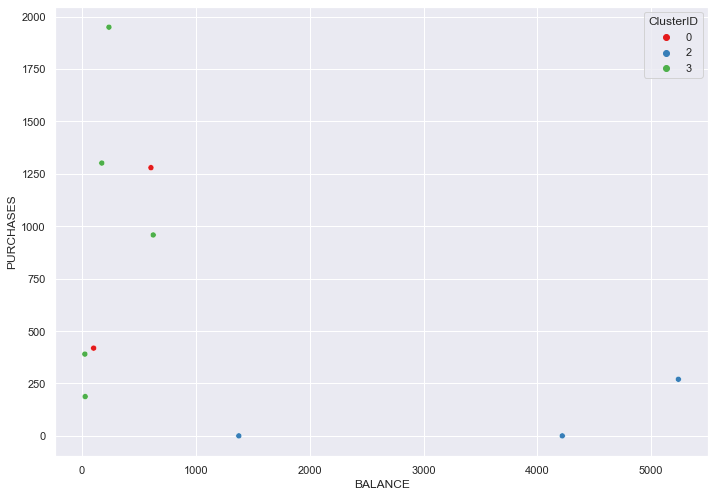

In [ ]:
# plotting hasil prediksi dengan format yg sama pada eval nilai k
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = clus_inf,x = 'BALANCE',y='PURCHASES',hue = 'ClusterID',palette="Set1")

## KESIMPULAN

Terdapat 3 model yaitu kmeans, dbscan, dan SC yaang telah dibuat namun dari ketiga hasil, didapatkan hasil terbaik menggunakan kmeans. Berdasarkan pemodelan yang telah dibuat, terdapat 4 klaster dari 0-3. 4 klaster ini merupakan yang terbaik dengan menggunakan percobaan k dari 1 hingga 10, dan elbow berada pada k saat 4. silhouette score yang dihasilkan dengan k = 4 ialah 0.23. nilai ini belum cukup baik kaarena nilai yg baik seharusnya mendekati 1. Kemudian berdasarkan plotting juga belum dapat aterlihat jelas bagaimana clustering ini terjadi. Dengan plotting menggunakan kolom PURCHASES dan BALANCE masih tidak terlalu jelas batas-batas antara klaster 1 dan 3. Sehingga, pemodelan ini dapat dikatan belum cukup baik untuk melakukan clustering terhadap pengguna kartu kredit dan perlu dilakukan perbaikan model.

dengan data inference pun masih belum bisa terlihat jelas bagaimana proses clustering ini terjadi.

## CONCEPTUAL PROBLEMS

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
    Inersia mengukur seberapa baik kumpulan data dikelompokkan oleh K-Means kemudian dihitung dengan mengukur jarak antara setiap titik data dan pusat massanya, mengkuadratkan jaraknya, dan menjumlahkan kuadrat ini di satu cluster.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll)
    Elbow digunakan dalam menentukan jumlah klaster dalam suatu kumpulan data. Metode ini terdiri dari memplot variasi sebagai fungsi dari jumlah cluster, dan memilih siku kurva sebagai jumlah cluster yang akan digunakan. Menggunakan "siku" sebagai titik potong adalah metode umum dalam optimasi untuk memilih titik di mana hasil yang semakin berkurang tidak lagi sebanding dengan penambahan. Dalam pengelompokan harus memilih sejumlah klaster sehingga menambahkan klaster lagi tidak memberikan pemodelan data yang jauh lebih baik. kelebihan metode ini ialah dengan menentukan elbow yg tepat tentunya akan menghasilkan hasil yg optimal karena kita tahu nilai K diatas k terbaik tidak akan berpengaruh banyak, namun kelemahannya ini ialah bagaimana kita mengambil nilai elbow yg tepat sehingga hasil yang kita peroleh juga maksimal terutama pada grafik yg elbownya susah terlihat.

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

    kmeans merupakan salah satu metode cluster analysis non hirarki yang  mempartisi objek yang ada kedalam satu atau lebih cluster atau kelompok objek berdasarkan karakteristiknya, sehingga objek yang mempunyai karakteristik yang sama dikelompokan dalam satu cluster yang sama dan objek yang mempunyai karakteristik yang berbeda dikelompokan kedalam cluster yang lain. Metode K-Means Clustering berusaha mengelompokkan data yang ada ke dalam beberapa kelompok, dimana data dalam satu kelompok mempunyai karakteristik yang sama satu sama lainnya dan mempunyai karakteristik yang berbeda dengan data yang ada di dalam kelompok yang lain.

    dbscan adalah algoritma pengelompokan yang didasarkan pada kepadatan data. Kepadatan yang dimaksud dalam DBSCAN adalah banyaknya data (minPts) yang berada dalam radius Eps (ɛ) dari setiap data. Konsep kepadatan seperti ini menghasilkan tiga macam status dari setiap data, yaitu inti (core), batas (border), dan noise. Data inti merupakan data yang jumlah data di dalam radius eps lebih dari minPts, data noise merupakan data yang jumlah data di dalam radius eps kurang dari minPts, dan data batas merupakan data yang jumlah data di dalam radius eps kurang dari minPts tetapi menjadikan data tetangganya menjadi data inti. Proses pengelompokan DBSCAN adalah menghitung jarak titik pusat (p) ke titik yang lain menggunakan jarak Euclidean dan dinyatakan dalam persamaan.

    SC mereduksi kumpulan data multidimensi yang kompleks menjadi kumpulan data serupa dalam dimensi yang lebih jarang. Garis besar utamanya adalah untuk mengelompokkan semua spektrum titik data yang tidak terorganisir ke dalam beberapa kelompok berdasarkan keunikannya (yaitu titik data) yang terhubung atau langsung bersebelahan diidentifikasi dalam grafik. Node tersebut kemudian dipetakan ke ruang dimensi rendah yang dapat dengan mudah dipisahkan untuk membentuk cluster. Pengelompokan Spektral menggunakan informasi dari nilai eigen (spektrum) dari matriks khusus (yaitu Matriks Afinitas, Matriks Derajat, dan Matriks Laplacian) yang berasal dari grafik atau kumpulan data.